Matplotlib is building the font cache; this may take a moment.


Diskon yang diberikan: 25.00%


c:\Users\wynacom\AppData\Local\Programs\Python\Python313\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


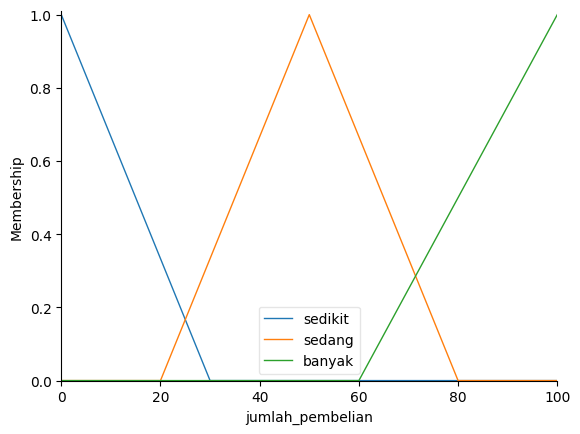

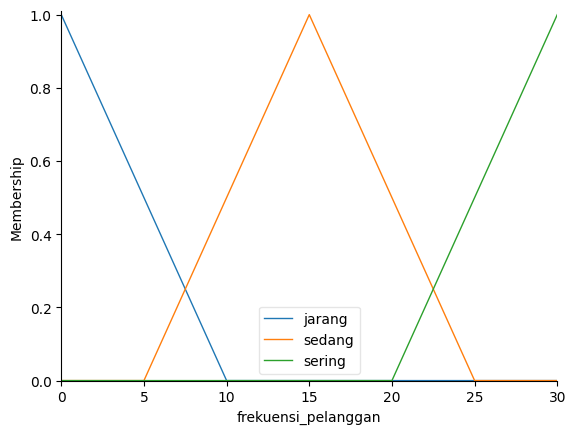

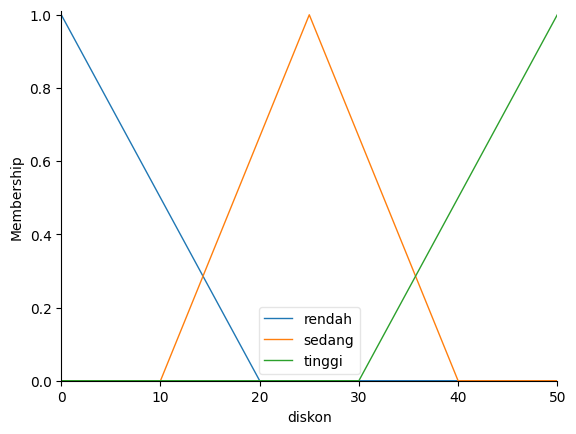

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Requirement Library
# Terminal : pip install scikit-fuzzy
# Collab : !pip install scikit-fuzzy

# Variabel input
jumlah_pembelian = ctrl.Antecedent(np.arange(0, 101, 1), 'jumlah_pembelian')
frekuensi_pelanggan = ctrl.Antecedent(np.arange(0, 31, 1), 'frekuensi_pelanggan')

# Variabel output
diskon = ctrl.Consequent(np.arange(0, 51, 1), 'diskon')

# Membership function untuk jumlah_pembelian
jumlah_pembelian['sedikit'] = fuzz.trimf(jumlah_pembelian.universe, [0, 0, 30])
jumlah_pembelian['sedang'] = fuzz.trimf(jumlah_pembelian.universe, [20, 50, 80])
jumlah_pembelian['banyak'] = fuzz.trimf(jumlah_pembelian.universe, [60, 100, 100])

# Membership function untuk frekuensi_pelanggan
frekuensi_pelanggan['jarang'] = fuzz.trimf(frekuensi_pelanggan.universe, [0, 0, 10])
frekuensi_pelanggan['sedang'] = fuzz.trimf(frekuensi_pelanggan.universe, [5, 15, 25])
frekuensi_pelanggan['sering'] = fuzz.trimf(frekuensi_pelanggan.universe, [20, 30, 30])

# Membership function untuk diskon
diskon['rendah'] = fuzz.trimf(diskon.universe, [0, 0, 20])
diskon['sedang'] = fuzz.trimf(diskon.universe, [10, 25, 40])
diskon['tinggi'] = fuzz.trimf(diskon.universe, [30, 50, 50])

# Aturan fuzzy
rule1 = ctrl.Rule(jumlah_pembelian['sedikit'] & frekuensi_pelanggan['jarang'], diskon['rendah'])
rule2 = ctrl.Rule(jumlah_pembelian['sedikit'] & frekuensi_pelanggan['sering'], diskon['sedang'])
rule3 = ctrl.Rule(jumlah_pembelian['banyak'] & frekuensi_pelanggan['sering'], diskon['tinggi'])
rule4 = ctrl.Rule(jumlah_pembelian['sedang'] & frekuensi_pelanggan['sedang'], diskon['sedang'])
rule5 = ctrl.Rule(jumlah_pembelian['banyak'] & frekuensi_pelanggan['jarang'], diskon['sedang'])

# Sistem kontrol
sistem_diskon_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
sistem_diskon = ctrl.ControlSystemSimulation(sistem_diskon_ctrl)

# Contoh input
sistem_diskon.input['jumlah_pembelian'] = 70
sistem_diskon.input['frekuensi_pelanggan'] = 20

# Hitung hasil
sistem_diskon.compute()

# Output hasil
diskon_output = sistem_diskon.output['diskon']
print(f'Diskon yang diberikan: {diskon_output:.2f}%')

# Visualisasi
jumlah_pembelian.view()
frekuensi_pelanggan.view()
diskon.view()
